In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("student_scores.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [4]:
df.describe() #tells you stats

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info() #tells you what data types are in the columns 
#and how many values that are not null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [7]:
df.isnull().sum() #tells you how many values are null in each column

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [8]:
#To delete Unnamed column:
#Drop unnamed column
df = df.drop("Unnamed: 0", axis = 1) # axis = 1 means deleting from vertical axis
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [ ]:
#If under WklyStudyHours column it said 05-Oct or something instead of 5-10 I can change it by doing:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct", "5-10") #we are replacing a string in this case
#in replace brackets it's ("what's being replaced", "what to replace is with")
df.head()

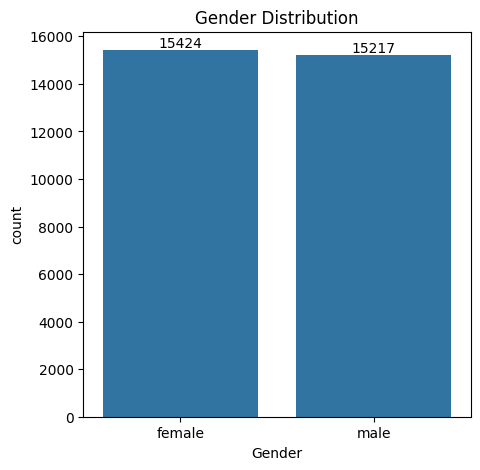

In [23]:
#Gender Distribution
plt.figure(figsize = (5,5)) #changing dimensions of chart (width, height)
ax = sns.countplot(data = df, x = "Gender") #data is in df, store in ax when we want exact values on top of bars in chart
ax.bar_label(ax.containers[0]) #this code is for number label on top of each bar
#in square brackets above it's 0 because there's only one bar in each section, if there were two overlapping bars we could do (ax.containers[1])
plt.title("Gender Distribution") #have to add title after creating chart before "show"
plt.show()

In [ ]:
#from the above chart we have analyzed that:
#the number of females is more than the number of males

In [16]:
gb = df.groupby("ParentEduc").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'}) #gb stands for groupby
#"The GROUPBY function allows you to group, aggregate, sort, and filter data based on the fields you specify."
print(gb)


                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


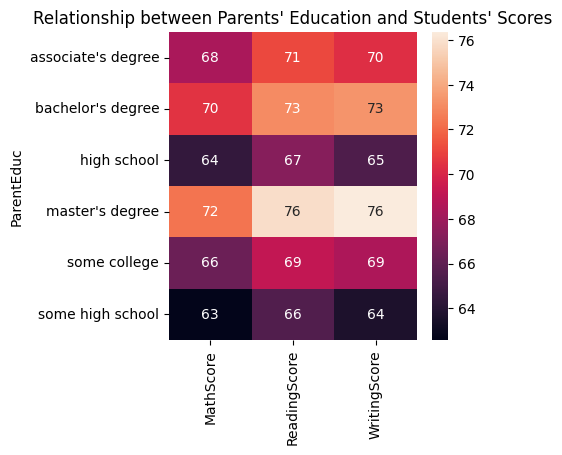

In [25]:
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True) #when annot is set to True a data value is written in each cell of the heatmap
plt.title("Relationship between Parents' Education and Students' Scores")
plt.show()

In [ ]:
#from the above chart we have concluded that:
#the education of parents has a good/decent impact on student scores
#(12% difference between highest and lowest student scores)

In [21]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore": 'mean', "ReadingScore": 'mean', "WritingScore": 'mean'}) 
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


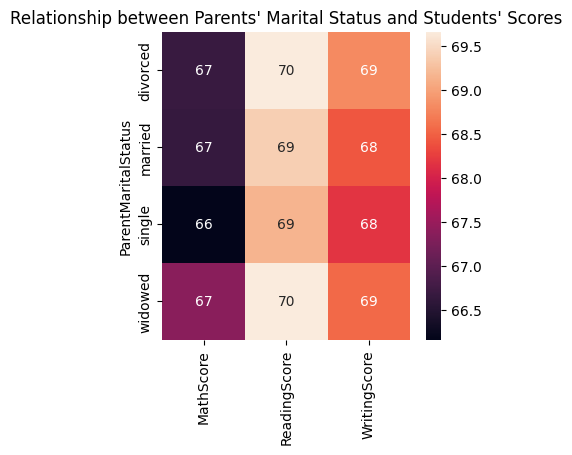

In [24]:
plt.figure(figsize = (4,4))
sns.heatmap(gb1, annot = True)
plt.title("Relationship between Parents' Marital Status and Students' Scores")
plt.show()

In [ ]:
#from the above chart we have concluded that:
#since there is only a 3% difference between the highest and lowest student score
#parents' marital status has no/negligible impact on student scores

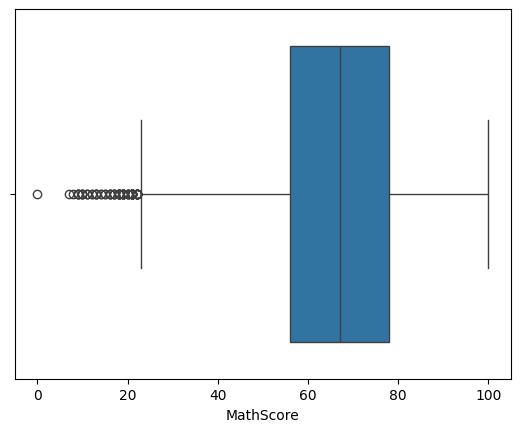

In [26]:
#When comparing two values i.e. Number of Sibings v.s. Math Score, can use a box plot:
#used to detect outliers/extreme values
sns.boxplot(data = df, x = "MathScore")
plt.show()
#central line is median value
#there's max. and min. average values and dots outside are outliers

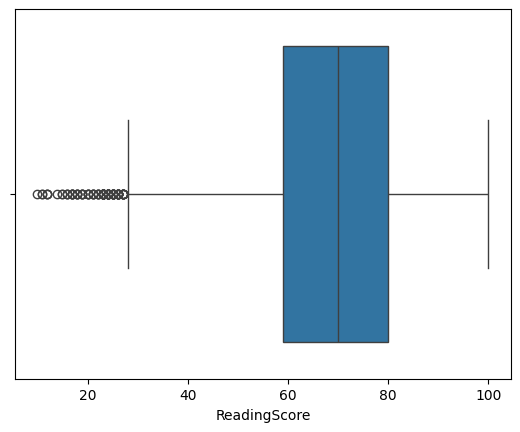

In [27]:
sns.boxplot(data = df, x = "ReadingScore")
plt.show()

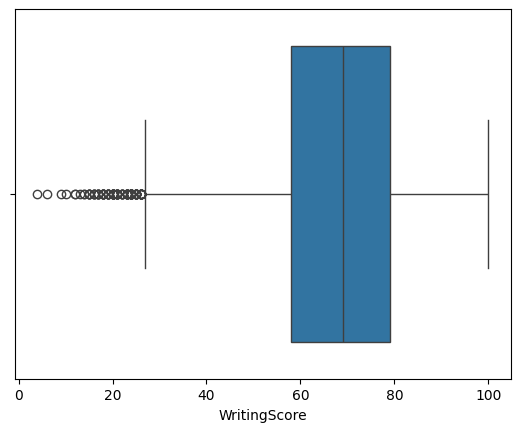

In [28]:
sns.boxplot(data = df, x = "WritingScore")
plt.show()

In [29]:
#how many unique values(in this case types of Groups) there are in Ethnic Group Column:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


[np.int64(2219), np.int64(5826), np.int64(9212), np.int64(7503), np.int64(4041)]


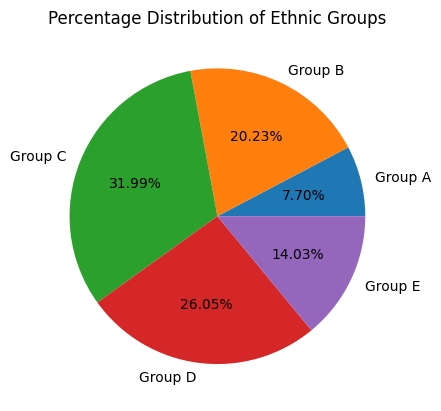

In [43]:
#Percentage Distribution of Ethnic Groups
#first create count for pi-chart
groupA = df.loc[(df["EthnicGroup"] == "group A")].count() #loc() used to slice a dataset
#adding count() at the end gives us the total number of people in group A for each column
groupB = df.loc[(df["EthnicGroup"] == "group B")].count()
groupC = df.loc[(df["EthnicGroup"] == "group C")].count()
groupD = df.loc[(df["EthnicGroup"] == "group D")].count()
groupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["Group A", "Group B", "Group C", "Group D", "Group E"]
#to get only the count for each grouo in Ethnic Group instead of in all columns:
mylist = [groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

#print(mylist), for checking values
plt.pie(mylist, labels = l, autopct = "%1.2f%%" ) #pass in mylist which contains values of each group and l which contains labels for each group respectively
#autopct allows you to display the percentage value of each slice using Python string formatting.
#the % sign before the number calculates the percentage value of the slice to display
#the number after the decimal point is for how many decimal places you want the displayed percentage to be
#the double %% sign after the number is to add a % sign after the displayed percentage
plt.title("Percentage Distribution of Ethnic Groups")
plt.show()
#can pass a legend, change colours, highlight labels, etc. if wanted

[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

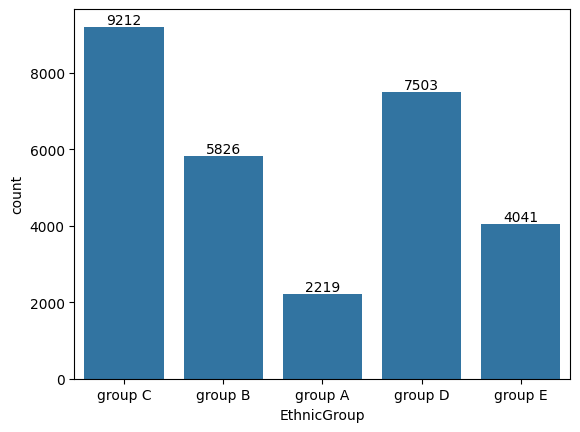

In [42]:
#to check if your values are correct we can make a count plot:
ax = sns.countplot(data = df, x  = "EthnicGroup")
ax.bar_label(ax.containers[0])
#and cross-reference values with printed my list above